# PHYS591000 Lab 05
--- 
## Goal
In this Lab 05, you will practice:

* Regression -- Linear Regression 

* Performance Test -- Energy Resolution

## Introduction

* We will take electron neutrino showering data from the Oscillation Project with Emulsion-tRacking Apparatus (OPERA) for regression task.

* The electron neutrino showering data contain `Ntotal`, `Nmax`, `izmax` and `Energy`.

`Energy`: Electron neutrino energy

`Ntotal`: Total number of hits

`Nmax`: Max hit multiplicity in one layer

`izmax`: Depth of shower max

* We will use scikit-learn packages: LinearRegression for regression problems.

* We will bulid three linear functions to fit `Ntotal` v.s `Energy`, `Nmax` v.s `Energy` and `izmax` v.s `Energy`.

* Then, we will use three features: `Ntotal`, `Nmax`, `izmax` together in the fitting.

* To show the preformance of regression, we can make two kinds of figure for energy resolution:

$$ Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

and 

$$ RMSE(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

to show how good our regression model is.

* Bonus: Using TensorFlow for regression problem.



## Useful Reference

Ref. [OPERA](https://en.wikipedia.org/wiki/OPERA_experiment)

Ref. [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Ref. [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

Ref. [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Ref. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Ref. [Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

Ref. [Basic regression using Tensorflow](https://www.tensorflow.org/tutorials/keras/regression)

Ref. [Root-mean-square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
import tensorflow as tf 
from tensorflow.keras.layers.experimental import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-week05/neutrino.npz
/kaggle/input/phys591000-week05/pseudo_data.npz
/kaggle/input/phys591000-week05/neutrino_train.npz
/kaggle/input/phys591000-week05/neutrino_test.npz


# Part 1 - Linear Regression

### $\color\red{\text{In part 1, please use `/kaggle/input/phys591000-week05/neutrino_train.npz` to train your regression model!}}$

### 1.1 - Code
* Load the dataset from `/kaggle/input/phys591000-week05/neutrino_train.npz` 
* Show festures inside this data.
* Please make 3 figures: "Ntotal" v.s "Energy", "Nmax" v.s "Energy" and "izmax" v.s "Energy".

File's contents:  ['Energy', 'Ntotal', 'Nmax', 'izmax']


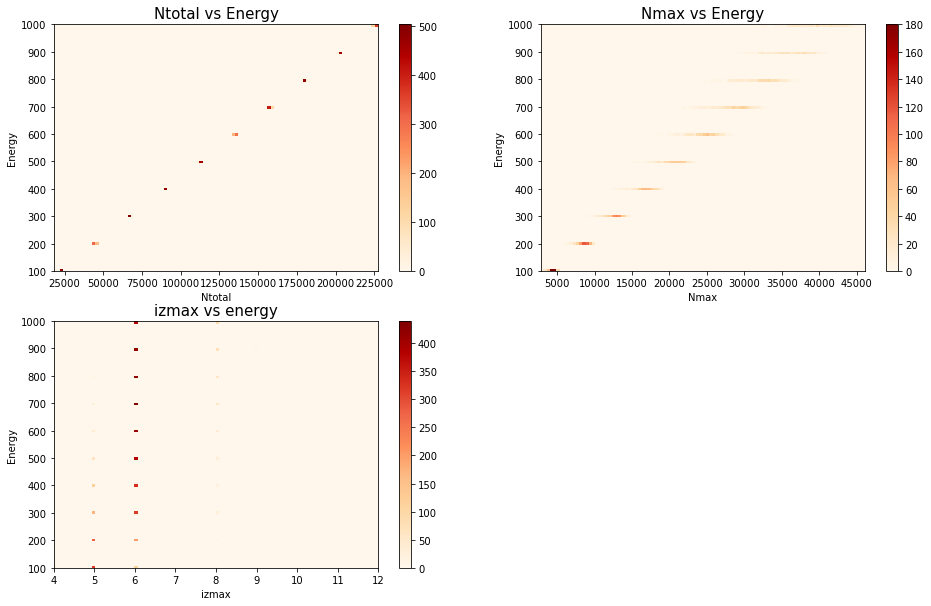

In [2]:
##############################################################################
#Code for 1.1
# 1. Load the dataset from `/kaggle/input/phys591000-week05/neutrino_train.npz` 
# 2. Show festures inside this data.
# 3. Please make 3 figures: "Ntotal" v.s "Energy", "Nmax" v.s "Energy" and "izmax" v.s "Energy".
##############################################################################
# Please code in this cell


"""
load neutrino data
"""
file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

print("File's contents: ", file.files)



"""
visualize data to show relations in "Ntotal" v.s "Energy", "Nmax" v.s "Energy" and "izmax" v.s "Energy".
"""

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.hist2d( file["Ntotal"], file["Energy"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("Energy")
plt.xlabel("Ntotal")
plt.title("Ntotal vs Energy", fontsize=15)
plt.subplot(2,2,2)
plt.hist2d( file["Nmax"], file["Energy"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("Energy")
plt.xlabel("Nmax")
plt.title("Nmax vs Energy", fontsize=15)
plt.subplot(2,2,3)
plt.hist2d( file["izmax"], file["Energy"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("Energy")
plt.xlabel("izmax")
plt.title("izmax vs energy", fontsize=15)
plt.show()

##############################################################################

### 1.2 - Code

* Please use scikit-learn package: "LinearRegression" to fit `Ntotal` to `Energy`. Make sure you do the normalization to `Ntotal` before fitting it.  What you need to do is just like what you did in the in-class quiz 05(you will no longer use pipeline and PolynomialFeatures function).

* A normalization done by divide the `Ntotal` with its maximun value is fine in this practice. 

* After you get the regression function, please make a figure to show your regression function.

* Notice: Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`

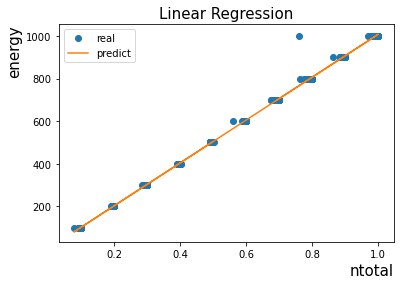

In [3]:
##############################################################################
#Code for 1.2
# 1. Please use scikit-learn package: "LinearRegression" to fit `Ntotal` to `Energy`. 
#    Make sure you do the normalization to `Ntotal` before fitting it.  
#    What you need to do is just like what you did in the in-class quiz 05(you will no longer use pipeline and PolynomialFeatures function).
# 2. A normalization done by divide the `Ntotal` with its maximun value is fine in this practice. 
# 3. After you get the regression function, please make a figure to show your regression function.
# 4. Notice: Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`
##############################################################################
# Please code in this cell
neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

ntotal = neutrino_file["Ntotal"]/np.max(neutrino_file["Ntotal"])
energy = neutrino_file["Energy"]

LR = LinearRegression().fit(ntotal[:, np.newaxis],energy)

y_pred=LR.predict(ntotal.reshape(-1, 1))

plt.plot(ntotal,energy,'o',label='real')
plt.plot(ntotal,y_pred,label='predict')
plt.ylabel("energy", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("ntotal", fontsize=15,horizontalalignment='right',x=1)
plt.title("Linear Regression", fontsize=15)
plt.legend()
plt.show()


##############################################################################

### 1.3 - Code

* Please use scikit-learn package: "LinearRegression" to fit `Nmax`. Make sure you do the normalization to `Nmax` before fitting it.

* A normalization done by divide the `Nmax` with its maximun value is fine in this practice. 

* After you get the regression function, please make a figure to show your regression function.

* Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`

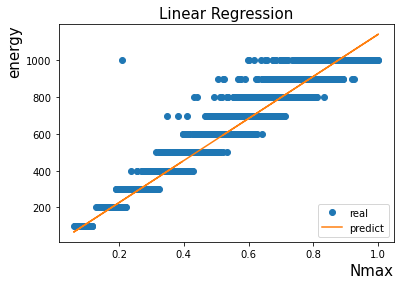

In [4]:
##############################################################################
#Code for 1.3
# 1. Please use scikit-learn package: "LinearRegression" to fit `Nmax`. Make sure you do the normalization to `Nmax` before fitting it.
# 2. A normalization done by divide the `Nmax` with its maximun value is fine in this practice.
# 3. You should use these three features to do regression.
# 4. Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`
##############################################################################
# Please code in this cell
neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

Nmax = neutrino_file["Nmax"]/np.max(neutrino_file["Nmax"])
energy = neutrino_file["Energy"]

LR = LinearRegression().fit(Nmax[:, np.newaxis],energy)

y_pred=LR.predict(Nmax.reshape(-1, 1))

plt.plot(Nmax,energy,'o',label='real')
plt.plot(Nmax,y_pred,label='predict')
plt.ylabel("energy", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("Nmax", fontsize=15,horizontalalignment='right',x=1)
plt.title("Linear Regression", fontsize=15)
plt.legend()
plt.show()

##############################################################################

### 1.4 - Code

* Please use scikit-learn package: "LinearRegression" to fit `izmax`. Make sure you do the normalization to `izmax` before fitting it.

* A normalization done by divide the `izmax` with its maximun value is fine in this practice. 

* After you get the regression function, please make a figure to show your regression function.

* Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`



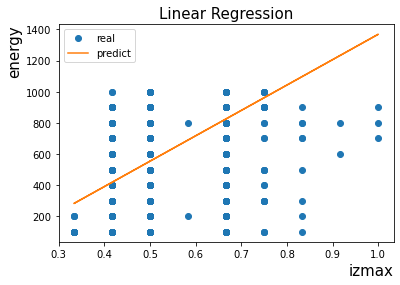

In [5]:
##############################################################################
#Code for 1.4
# 1. Please use scikit-learn package: "LinearRegression" to fit `izmax`. Make sure you do the normalization to `izmax` before fitting it.
# 2. A normalization done by divide the `izmax` with its maximun value is fine in this practice.
# 3. You should use these three features to do regression.
# 4. Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`
##############################################################################
# Please code in this cell

neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

izmax = neutrino_file["izmax"]/np.max(neutrino_file["izmax"])
energy = neutrino_file["Energy"]

LR = LinearRegression().fit(izmax[:, np.newaxis],energy)

coef = LR.coef_
intercept=LR.intercept_

y_pred=LR.predict(izmax.reshape(-1, 1))

plt.plot(izmax,energy,'o',label='real')
plt.plot(izmax,y_pred,label='predict')
plt.ylabel("energy", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("izmax", fontsize=15,horizontalalignment='right',x=1)
plt.title("Linear Regression", fontsize=15)
plt.legend()
plt.show()
##############################################################################

### 1.5 - Code

* Please use scikit-learn package: "LinearRegression" to fit `Ntotal`, `Nmax` and `izmax` to `Energy`, simultaneously. Make sure you do the normalization for each features before fitting.

* Please figure out how to do multi-feature fitting based on hints.

* After you get the regression function, please make a figure to show your regression function ("Nmax" v.s "Energy").

* Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`

[Hint: Numpy Stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)  
[Hint: LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



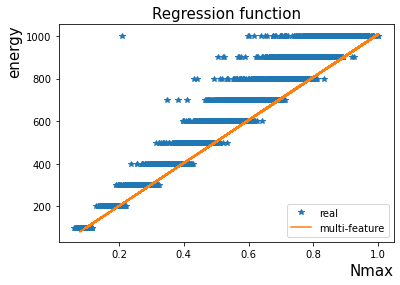

In [6]:
##############################################################################
#Code for 1.5
# 1. Please use scikit-learn package: "LinearRegression" to fit `Ntotal`, `Nmax` and `izmax` to `Energy`, simultaneously. Make sure you do the normalization for each features before fitting.
# 2. Please figure out how to do muli-feature fitting based on hints.
# 3. After you get the regression function, please make a figure to show your regression function ("Nmax" v.s "Energy"). 
# 4. Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_train.npz`
##############################################################################
# Please code in this cell
neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

Ntotal = neutrino_file["Ntotal"]/np.max(neutrino_file["Ntotal"])
Nmax = neutrino_file["Nmax"]/np.max(neutrino_file["Nmax"])
izmax = neutrino_file["izmax"]/np.max(neutrino_file["izmax"])
energy = neutrino_file["Energy"]

energy = np.reshape(energy,(len(energy),1))

stack=np.stack([Ntotal,Nmax,izmax])
stack1=np.transpose(stack)

LR = LinearRegression().fit(stack1,energy)

y_pred=LR.predict(stack1)

plt.plot(Nmax,energy,'*',label='real')
plt.plot(Ntotal,y_pred,label='multi-feature')
plt.ylabel("energy", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("Nmax", fontsize=15,horizontalalignment='right',x=1)
plt.title("Regression function", fontsize=15)
plt.legend()
plt.show()

##############################################################################

# Part 2 - Regression Performance 

* We will show regression performance in energy resolution.

* There are two kinds of figure:

* One is 

$$ Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

* The other is

$$ RMSE(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

* We will start from the performance of the regression model 1.2 (fit "Ntotal" to "Energy").

* Then, apply the same precedure to each model and make a figure for comparison.

### $\color\red{\text{In part 2, please use `/kaggle/input/phys591000-week05/neutrino_test.npz` to test your regression model!}}$

### 2.1 - Code

* Use the regression model you trained in 1.2 to predict the `Energy` using `Ntotal` value. Make sure you normalize the data before feeding it to the model.

* A normalization done by divide the feature with its maximun value is fine in this practice.

* After prediction done, calculate the mean value of the difference between predictive energy and truth energy, then divided by truth energy. Be careful about the energy bins when you dealing this problem.

* The energy bins are `100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 GeV`. For each bin, you should calculate 

$$  Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}})$$


* After you get values for each bin, you can make a figure which x-axis is the truth energy and y-axis is the mean value of the difference between predictive energy and truth energy in percentage.

$$ Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

* Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`

One example is like below:


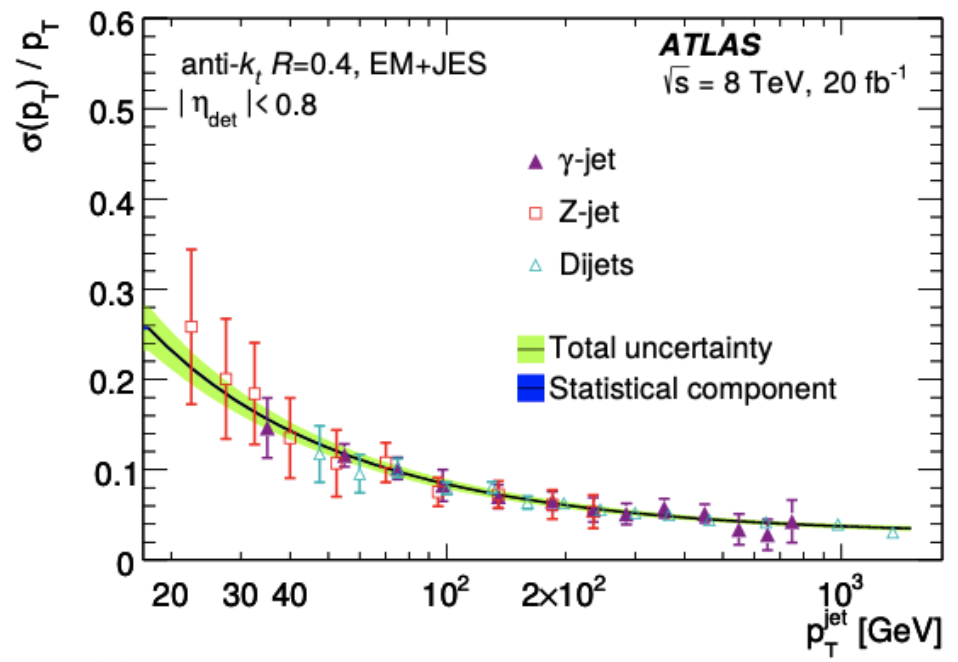

[[arXiv:1910.04482](https://arxiv.org/pdf/1910.04482.pdf)]

Although the y-axis is relative uncertainty, we still can get some idae from this figure.
The x-axis is transverse momentum. In each transverse momentum bin, there are serveral data. 
We can take the data in a bin to get predictive values. Then, we can calculate the difference between predictive value and truth value. After that, we can get the mean value of difference for this bin.

Following this precedure to get mean values of difference for each bin, we can make a figure for 

$$ Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

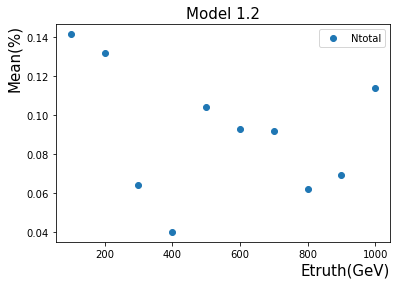

In [7]:
##############################################################################
#Code for 2.1
# 1. Use the regression model you trained in 1.2 to predict the `Energy` using `Ntotal` value. 
#    Make sure you normalize the data before feeding it to the model.

# 2. A normalization done by divided the feature with its maximun value is fine in this practice.

# 3. After prediction done, calculate the mean value of the difference between predictive energy 
#    and truth energy, then divided by truth energy. Be careful about the energy bins when you dealing this problem.

# 4. The energy bins are `100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 GeV`. 
#   For each bin, you should calculate $$  Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}})$$

# 5. After you get values for each bin, you can make a figure which x-axis is the truth energy 
#   and y-axis is the mean value of the difference between predictive energy and truth energy in percentage.
#  $$ Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

# 6. Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`
##############################################################################
# Please code in this cell
####train
neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

ntotal = neutrino_file["Ntotal"]/np.max(neutrino_file["Ntotal"])
energy = neutrino_file["Energy"]

LR = LinearRegression().fit(ntotal[:, np.newaxis],energy)

#####test
neutrino_test = np.load("/kaggle/input/phys591000-week05/neutrino_test.npz", allow_pickle=True)

Ntotal_tr=neutrino_test['Ntotal']/np.max(neutrino_test["Ntotal"])
Energy_tr=neutrino_test['Energy']

x2,y2=zip(*sorted(zip(Energy_tr, Ntotal_tr)))
Ntotal_tr=np.reshape(y2,(5000,1))
Energy_tr=np.reshape(x2,(5000,1))

energy_tab=[]
mean_tab=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr == 100*i
 energy = Energy_tr[val]
 for j in range(len(Energy_tr)):
    if  Energy_tr[j] == 100*i: 
     mean = (LR.predict(Ntotal_tr[j].reshape(-1, 1))-Energy_tr[j])/Energy_tr[j]
     #print(mean)
     mean_value.append(mean)
     #print("mean_value",mean_value)
 mean_tab0 = 100*np.mean(mean_value)
 mean_tab.append(mean_tab0)
 en_tr=100*i
 energy_tab.append(en_tr)

plt.plot(energy_tab,mean_tab,'o',label='Ntotal')
plt.ylabel("Mean(%)", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("Etruth(GeV)", fontsize=15,horizontalalignment='right',x=1)
plt.title("Model 1.2", fontsize=15)
plt.legend()
plt.show()

##############################################################################

### 2.2 - Code

* Use the regression model you trained in 1.2 to predict the `Energy` using `Ntotal` value. Make sure you normalize the data before feeding it to the model.

* A normalization done by divide the feature with its maximun value is fine in this practice.

* After prediction done, calculate the root-mean-square-error value of the difference between predictive energy and truth energy, then divided by truth energy. Be careful about the energy bins when you dealing this problem.

* The energy bins are `100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 GeV`. For each bin, you should calculate 

$$ RMSE(\frac{E_{prediction} - E_{truth}}{E_{truth}})$$

* After you get values for each bin, you can make a figure which x-axis is the truth energy and y-axis is the mean value of the difference between predictive energy and truth energy in percentage. 

$$  RMSE(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

* Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`


[Hint: Root-mean-square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

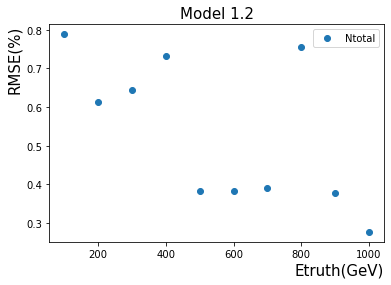

In [8]:
##############################################################################
#Code for 2.2
# 1. Use the regression model you trained in 1.2 to predict the `Energy` using `Ntotal` value. 
#    Make sure you normalize the data before feeding it to the model.

# 2. A normalization done by divide the feature with its maximun value is fine in this practice.

# 3. After prediction done, calculate the root-mean-square-error value of the difference between predictive energy 
#    and truth energy, then divided by truth energy. Be careful about the energy bins when you dealing this problem.

# 4. The energy bins are `100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 GeV`. 
#    For each bin, you should calculate $$ RMSE(\frac{E_{prediction} - E_{truth}}{E_{truth}})$$

# 5. After you get values for each bin, you can make a figure which x-axis is the truth energy 
#    and y-axis is the mean value of the difference between predictive energy and truth energy in percentage. 
#   $$  RMSE(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$

# 6. Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`
##############################################################################
# Please code in this cell
neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

ntotal = neutrino_file["Ntotal"]/np.max(neutrino_file["Ntotal"])
energy = neutrino_file["Energy"]

LR = LinearRegression().fit(ntotal[:, np.newaxis],energy)


neutrino_test = np.load("/kaggle/input/phys591000-week05/neutrino_test.npz", allow_pickle=True)

Ntotal_tr=neutrino_test['Ntotal']/np.max(neutrino_test["Ntotal"])
Energy_tr=neutrino_test['Energy']

x2,y2=zip(*sorted(zip(Energy_tr, Ntotal_tr)))
Ntotal_tr=np.reshape(y2,(5000,1))
Energy_tr=np.reshape(x2,(5000,1))

energy_tab=[]
sq_tab=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr == 100*i
 energy = Energy_tr[val]
 for j in range(len(Energy_tr)):
    if  Energy_tr[j] == 100*i: 
     mean_sq = np.square((LR.predict(Ntotal_tr[j].reshape(-1, 1))-Energy_tr[j])/Energy_tr[j])
     #print(mean)
     mean_value.append(mean_sq)
     #print("mean_value",mean_value)
 sq_tab0 = 100*np.sqrt(np.mean(mean_value))
 sq_tab.append(sq_tab0)
 en_tr=100*i
 energy_tab.append(en_tr)
    
    
plt.plot(energy_tab,sq_tab,'o',label='Ntotal')
plt.ylabel("RMSE(%)", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("Etruth(GeV)", fontsize=15,horizontalalignment='right',x=1)
plt.title("Model 1.2", fontsize=15)
plt.legend()
plt.show()

##############################################################################

### 2.3 - Code

* Now, please make a figure which contains energy resolution curves in mean value of the difference for regression model 1.2~1.5 .

$$  Mean(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$


* The curve for "Ntotal" is `blue` with the marker style "s".

* The curve for "Nmax" is `red` with the marker style "d".

* The curve for "izmax" is `green` with the marker style "h".

* The curve for model 1.5 is `black` with the marker style "*".

* Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`





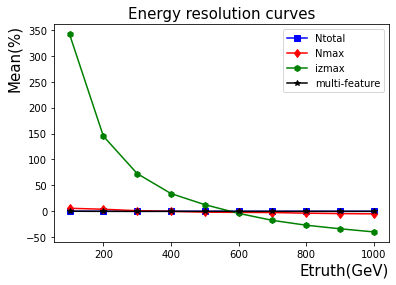

In [9]:
##############################################################################
#Code for 2.3
# 1. Now, please make a figure which contains energy resolution curves in mean value of difference for regression model 1.2~1.5 .
# 2. The curve for "Ntotal" is `blue` with the marker style "s".
# 3. The curve for "Nmax" is `red` with the marker style "d".
# 4. The curve for "izmax" is `green` with the marker style "h".
# 5. The curve for model 1.5 is `black` with the marker style "*".
# 6.  Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`
##############################################################################
# Please code in this cell
neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

ntotal = neutrino_file["Ntotal"]/np.max(neutrino_file["Ntotal"])
Nmax = neutrino_file["Nmax"]/np.max(neutrino_file["Nmax"])
izmax = neutrino_file["izmax"]/np.max(neutrino_file["izmax"])
energy = neutrino_file["Energy"]

LR_12 = LinearRegression().fit(ntotal[:, np.newaxis],energy)
LR_13 = LinearRegression().fit(Nmax[:, np.newaxis],energy)
LR_14 = LinearRegression().fit(izmax[:, np.newaxis],energy)

energy15 = np.reshape(energy,(len(energy),1))
stack15=np.stack([ntotal,Nmax,izmax])
stack15=np.transpose(stack15)

LR_15 = LinearRegression().fit(stack15,energy.reshape(-1, 1))

####test
neutrino_test = np.load("/kaggle/input/phys591000-week05/neutrino_test.npz", allow_pickle=True)

Ntotal_tr=neutrino_test['Ntotal']/np.max(neutrino_test["Ntotal"])
Nmax_tr=neutrino_test['Nmax']/np.max(neutrino_test["Nmax"])
izmax_tr=neutrino_test['izmax']/np.max(neutrino_test["izmax"])
Energy_tr=neutrino_test['Energy']

x12,y12=zip(*sorted(zip(Energy_tr, Ntotal_tr)))
Ntotal_tr12=np.reshape(y12,(5000,1))
Energy_tr12=np.reshape(x12,(5000,1))

x13,y13=zip(*sorted(zip(Energy_tr, Nmax_tr)))
Nmax_tr13=np.reshape(y13,(5000,1))
Energy_tr13=np.reshape(x13,(5000,1))

x14,y14=zip(*sorted(zip(Energy_tr, izmax_tr)))
izmax_tr14=np.reshape(y14,(5000,1))
Energy_tr14=np.reshape(x14,(5000,1))

energy15f=np.reshape(Energy_tr,(len(Energy_tr),1))
energy15f=energy.reshape(-1, 1)
energy15ff=np.stack([energy15f,energy15f,energy15f])
energy15ff=np.transpose(energy15f)

stack15f=np.stack([ntotal,Nmax,izmax])
stack15f=np.transpose(stack15f)

###12
energy_tab12=[]
mean_tab12=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr12 == 100*i
 energy = Energy_tr12[val]
 for j in range(len(Energy_tr12)):
    if  Energy_tr12[j] == 100*i: 
     mean = (LR_12.predict(Ntotal_tr12[j].reshape(-1, 1))-Energy_tr12[j])/Energy_tr12[j]
     mean_value.append(mean)
 mean_tab0 = 100*np.mean(mean_value)
 mean_tab12.append(mean_tab0)
 
 en_tr=100*i
 energy_tab12.append(en_tr)
    
###13
energy_tab13=[]
mean_tab13=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr13 == 100*i
 energy = Energy_tr13[val]
 for j in range(len(Energy_tr13)):
    if  Energy_tr13[j] == 100*i: 
     mean = (LR_13.predict(Nmax_tr13[j].reshape(-1, 1))-Energy_tr13[j])/Energy_tr13[j]
     mean_value.append(mean)
 mean_tab0 = 100*np.mean(mean_value)
 mean_tab13.append(mean_tab0)
 
 en_tr=100*i
 energy_tab13.append(en_tr)   
 
###14
energy_tab14=[]
mean_tab14=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr14 == 100*i
 energy = Energy_tr14[val]
 for j in range(len(Energy_tr14)):
    if  Energy_tr14[j] == 100*i: 
     mean = (LR_14.predict(izmax_tr14)[j]-Energy_tr14[j])/Energy_tr14[j]
     mean_value.append(mean)  
 mean_tab0 = 100*np.mean(mean_value)
 mean_tab14.append(mean_tab0)
 
 en_tr=100*i
 energy_tab14.append(en_tr)  
    
###15
energy_tab15=[]
mean_tab15=[]

for i in range(1,11):
 mean_value = []   
 val = energy15f == 100*i
 energy = energy15f[val]
 for j in range(len(energy15f)):
    if  energy15f[j] == 100*i: 
     mean = (LR_15.predict(stack15f)[j]-energy15f[j])/energy15f[j]
     mean_value.append(mean)
 mean_tab0 = 100*np.mean(mean_value)
 mean_tab15.append(mean_tab0)
 
 en_tr=100*i
 energy_tab15.append(en_tr)   
    
    
plt.plot(energy_tab12,mean_tab12,c= "blue",marker='s',label='Ntotal')
plt.plot(energy_tab13,mean_tab13,c= "red",marker='d',label='Nmax')
plt.plot(energy_tab14,mean_tab14,c= "green",marker='h',label='izmax')
plt.plot(energy_tab15,mean_tab15,c= "black",marker='*',label='multi-feature')
plt.ylabel("Mean(%)", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("Etruth(GeV)", fontsize=15,horizontalalignment='right',x=1)
plt.title("Energy resolution curves", fontsize=15)
plt.legend()
plt.show()





##############################################################################

### 2.4 - Code

* Now, please make a figure which contains energy resolution curves in root-mean-square-error value of the difference for regression model 1.2~1.5 .

$$  RMSE(\frac{E_{prediction} - E_{truth}}{E_{truth}}) \,\, (\%) \,\,\, \text{v.s} \,\,\, E_{truth} \,\,(GeV) $$



* The curve for "Ntotal" is `blue` with the marker style "s".

* The curve for "Nmax" is `red` with the marker style "d".

* The curve for "izmax" is `green` with the marker style "h".

* The curve for model 1.5 is `black` with the marker style "*".

* Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`





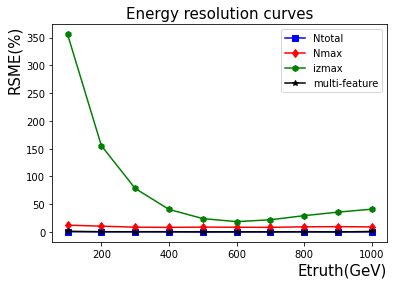

In [10]:
##############################################################################
#Code for 2.4
# 1. Now, please make a figure which contains energy resolution curves in root-mean-square-error value of difference for regression model 1.2~1.5 .
# 2. The curve for "Ntotal" is `blue` with the marker style "s".
# 3. The curve for "Nmax" is `red` with the marker style "d".
# 4. The curve for "izmax" is `green` with the marker style "h".
# 5. The curve for model 1.5 is `black` with the marker style "*".
# 6.  Make sure you are using the dataset in `/kaggle/input/phys591000-week05/neutrino_test.npz`
##############################################################################
# Please code in this cell
neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz", allow_pickle=True)

ntotal = neutrino_file["Ntotal"]/np.max(neutrino_file["Ntotal"])
Nmax = neutrino_file["Nmax"]/np.max(neutrino_file["Nmax"])
izmax = neutrino_file["izmax"]/np.max(neutrino_file["izmax"])
energy = neutrino_file["Energy"]

LR_12 = LinearRegression().fit(ntotal[:, np.newaxis],energy)

LR_13 = LinearRegression().fit(Nmax[:, np.newaxis],energy)

LR_14 = LinearRegression().fit(izmax[:, np.newaxis],energy)


energy15 = np.reshape(energy,(len(energy),1))

stack15=np.stack([ntotal,Nmax,izmax])
stack15=np.transpose(stack15)

LR_15 = LinearRegression().fit(stack15,energy.reshape(-1, 1))

neutrino_test = np.load("/kaggle/input/phys591000-week05/neutrino_test.npz", allow_pickle=True)

Ntotal_tr=neutrino_test['Ntotal']/np.max(neutrino_test["Ntotal"])
Nmax_tr=neutrino_test['Nmax']/np.max(neutrino_test["Nmax"])
izmax_tr=neutrino_test['izmax']/np.max(neutrino_test["izmax"])
Energy_tr=neutrino_test['Energy']

x12,y12=zip(*sorted(zip(Energy_tr, Ntotal_tr)))
Ntotal_tr12=np.reshape(y12,(5000,1))
Energy_tr12=np.reshape(x12,(5000,1))

x13,y13=zip(*sorted(zip(Energy_tr, Nmax_tr)))
Nmax_tr13=np.reshape(y13,(5000,1))
Energy_tr13=np.reshape(x13,(5000,1))

x14,y14=zip(*sorted(zip(Energy_tr, izmax_tr)))
izmax_tr14=np.reshape(y14,(5000,1))
Energy_tr14=np.reshape(x14,(5000,1))

energy15f=np.reshape(Energy_tr,(len(Energy_tr),1))
energy15f=energy.reshape(-1, 1)
energy15ff=np.stack([energy15f,energy15f,energy15f])
energy15ff=np.transpose(energy15f)

stack15f=np.stack([ntotal,Nmax,izmax])
stack15f=np.transpose(stack15f)

###12
energy_tab12=[]
sq_tab12=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr12 == 100*i
 energy = Energy_tr12[val]
 for j in range(len(Energy_tr12)):
    if  Energy_tr12[j] == 100*i:  
     mean_sq = np.square((LR_12.predict(Ntotal_tr12[j].reshape(-1, 1))-Energy_tr12[j])/Energy_tr12[j])
     mean_value.append(mean_sq)   
 sq_tab0 = 100*np.sqrt(np.mean(mean_value))
 sq_tab12.append(sq_tab0)   
 
 en_tr=100*i
 energy_tab12.append(en_tr)
    
###13
energy_tab13=[]
sq_tab13=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr13 == 100*i
 energy = Energy_tr13[val]
 for j in range(len(Energy_tr13)):
    if  Energy_tr13[j] == 100*i:  
     mean_sq = np.square((LR_13.predict(Nmax_tr13[j].reshape(-1, 1))-Energy_tr13[j])/Energy_tr13[j])   
     mean_value.append(mean_sq)    
 sq_tab0 = 100*np.sqrt(np.mean(mean_value))
 sq_tab13.append(sq_tab0)  

 en_tr=100*i
 energy_tab13.append(en_tr)   
 
###14
energy_tab14=[]
sq_tab14=[]

for i in range(1,11):
 mean_value = []   
 val = Energy_tr14 == 100*i
 energy = Energy_tr14[val]
 for j in range(len(Energy_tr14)):
    if  Energy_tr14[j] == 100*i: 
     mean_sq = np.square((LR_14.predict(izmax_tr14)[j]-Energy_tr14[j])/Energy_tr14[j])   
     mean_value.append(mean_sq)     
 sq_tab0 = 100*np.sqrt(np.mean(mean_value))
 sq_tab14.append(sq_tab0) 
    
 en_tr=100*i
 energy_tab14.append(en_tr)    
    
###15
energy_tab15=[]
sq_tab15=[]

for i in range(1,11):
 mean_value = []   
 val = energy15f == 100*i
 energy = energy15f[val]
 for j in range(len(energy15f)):
    if  energy15f[j] == 100*i: 
     mean_sq = np.square(((LR_15.predict(stack15f)[j])-energy15f[j])/energy15f[j])   
     mean_value.append(mean_sq)    
 sq_tab0 = 100*np.sqrt(np.mean(mean_value))
 sq_tab15.append(sq_tab0)    
 
 en_tr=100*i
 energy_tab15.append(en_tr)    
    
plt.plot(energy_tab12,sq_tab12,c= "blue",marker='s',label='Ntotal')
plt.plot(energy_tab13,sq_tab13,c= "red",marker='d',label='Nmax')
plt.plot(energy_tab14,sq_tab14,c= "green",marker='h',label='izmax')
plt.plot(energy_tab15,sq_tab15,c= "black",marker='*',label='multi-feature')
plt.ylabel("RSME(%)", fontsize=15,horizontalalignment='right',y=1)
plt.xlabel("Etruth(GeV)", fontsize=15,horizontalalignment='right',x=1)
plt.title("Energy resolution curves", fontsize=15)
plt.legend()
plt.show()

##############################################################################

### 2.5 Discussion

Please write down you discovery based on results you compute in 2.3 ~ 2.4.

### 2.5 Discussion

(Your answer)
Based on the results obtained from 2.3 and 2.4, we can say that when the preditction shows similar behavior as the real data, we obtain a low mean error rate, these rate give us an idea of how far our prediction is from real data but because this is mean value, when can have large variations around the prediction and these can cancel each other, so to be more accurate we can use the RSME which take the absolute value of the error between prediction and real data, and in this case the values that might be canceling due to sign, will have their weight on the positive range, so we can see an increase of the values when compared to mean rate for the positive range, that can give us more detail about where is the real data around the prediction point.

For instance, in the case for izmax data, the real data is way far from prediction so we can observe large mean and RSME values and will decay since the denominator is increasing. For RSME data we see an increment for Etruth higher than 600 GeV, this is because the negative values from mean now are giving its contribution on the positive side. 

For the multi-feature prediction, since we are counting with ntotal, izmax and nmax data, the fitting will be based on the three variables,so the mean and RSME rate will be more accourate as we can see from mean and RSME plots.



# Bonus - Regression in TensorFlow(10 pt.)

In the previuos section, you learned how to do linear regression using scikit-learn package.
Now, you may try to learn some advance skill using modern package.

In recent age, there are several opensource ML plattform can help you to establish a ML model or regression model. Such like [tensorflow](https://www.tensorflow.org/?hl=zh-tw), [Pytorch](https://pytorch.org/), [Caffe](https://caffe.berkeleyvision.org/), and [MXNet](https://mxnet.apache.org/versions/1.8.0/). By the help of these plattforms, learning and build up a machine learning workflow is no longer difficult.

In this bonus, you need to do linear regression using tensorflow package and show the performance of your jobs.

You can try to read the document and example provide by tensorflow and finish this bonus.

Hint: [Basic regression using tensorflow](https://www.tensorflow.org/tutorials/keras/regression)  
Hint: A lager number(~100) of epoch may help you to get a better result.  
Hint: Your MSE value should be less than 600 and MAE value should be less than 30.



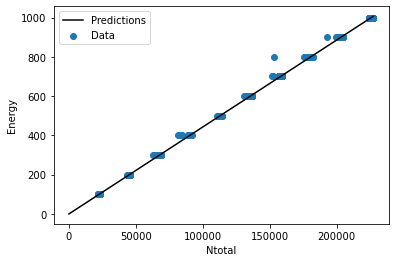

In [11]:
##############################################################################
#Code for Bonus
# Instead of linear regression function, please use TensorFlow to fit "Ntotal" to "Energy".
##############################################################################
# Please code in this cell
from tensorflow.keras import layers

data = np.load("/kaggle/input/phys591000-week05/neutrino_train.npz")
test = np.load("/kaggle/input/phys591000-week05/neutrino_test.npz")


df_train = pd.DataFrame({'ntotal':data["Ntotal"],'energy':data["Energy"]})
train_labels = df_train.pop("energy")
df_test = pd.DataFrame({'ntotal':test["Ntotal"],'energy':test["Energy"]})
test_labels = df_test.pop("energy")

#Normalization layer
ntotal_normalizer = preprocessing.Normalization(input_shape=[1,])
ntotal_normalizer.adapt(data["Ntotal"])

#sequential model
ntotal_model = tf.keras.Sequential([
    ntotal_normalizer,
    layers.Dense(units=1)
])
#compile
ntotal_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
    #loss='mean_squared_error')

#execute the training
history = ntotal_model.fit(
    data['Ntotal'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

#Collect the results on the test set
test_results = {}

test_results['ntotal_model'] = ntotal_model.evaluate(
    test['Ntotal'],
    test_labels, verbose=0)

#Visualize
x = tf.linspace(0.0, np.max(test["Ntotal"]),100000)
y = ntotal_model.predict(x)

def plot_ntotal(x, y):
    plt.scatter(test["Ntotal"], test_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Ntotal')
    plt.ylabel('Energy')
    plt.legend()
    
plot_ntotal(x,y)


##############################################################################